In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Load and review data

In [8]:
df = pd.read_csv("C:/Users/Owner/Documents/Preparing Diabetes Data For Training And Testing/pima-data.csv")

In [9]:
df.shape # dispalys number of rows and columns

(768, 10)

In [10]:
# inspect loaded data

df.head(5) # return first 5 lines from the data


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
df.tail(5) # last five lines of data


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of Features

In [12]:
comm = '''

From the metadata we have following definitions of features

|Feature     | Description            | Comments
-----------------------------------------------
num_preg     | number of pregnancies  |

glucose_conc | Plasma glucose concentation a 2 hrs in an oral glucose tolerance test

iastolic_bp  |Diastolic blood pressure (mm Hg)

thickness    |Tricpes skin fold thickeness (mm)

insulin      |2 Hrs serum insulin (mm U/ml)

bmi          |Body mass index (weight in kg/(height in m)^2)

diab_pred    |Diabetes pedigree function

age(years)   |Age (years)

skin         |????                     | What is this?

diabetes     |Class variable(1=True, 0=False)  | Why is pir data boolen(True/False)?

'''

### Check for null values

In [13]:
df.isnull().values.any() # isnull check each data if there is any null value

False

In [14]:
def plot_corr(df, size =11):

    comm = '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe

    Input    : df: pandas dataframe
    size     : Verticle and horizontal size of the plot

    Displays : matrix of correlation btween columns

           Blur-cyan-yellow-red-darkred ==> less to more correlations
           0 -----> 1
           Expect a dark red line running from top left to bottoem right
    '''

    corr = df.corr()  # dataframe correlation function
    fig,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)  #color code tha rectangles by correlation vlaues
    plt.xticks(range(len(corr.columns)),corr.columns) #drwa x tick marks
    plt.yticks(range(len(corr.columns)),corr.columns) #drwa y tick marks

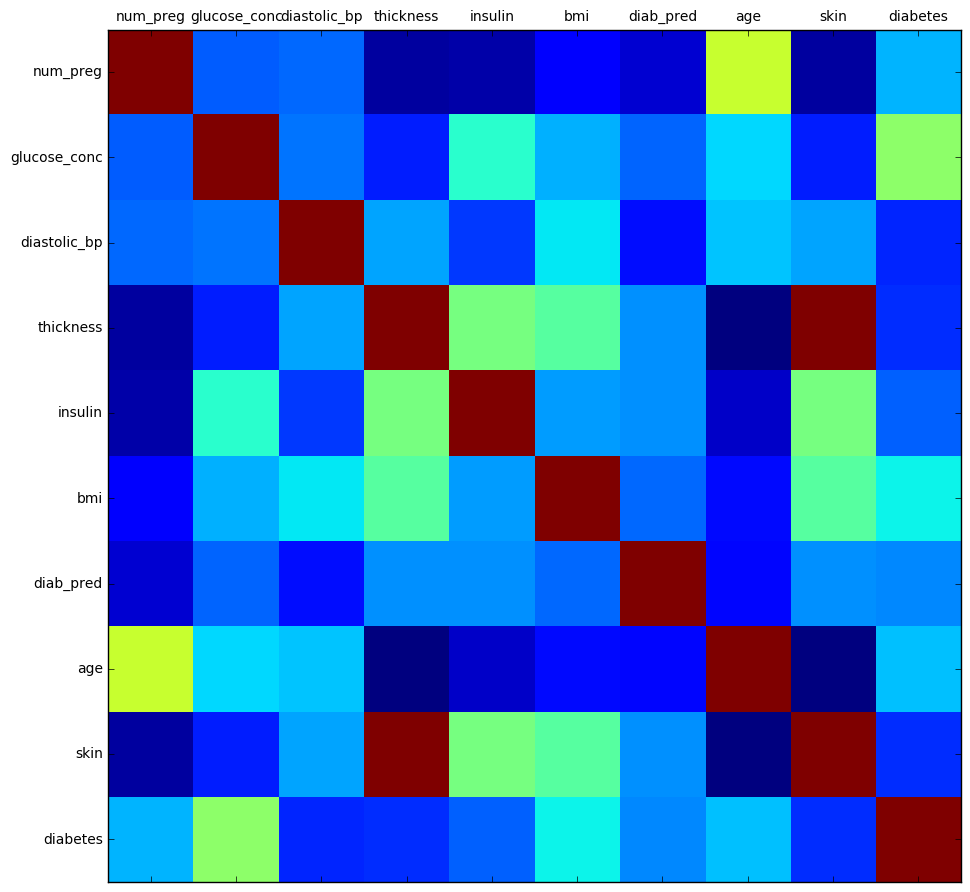

In [15]:
plot_corr(df) # column names running on horizontal and verticle axis

In [16]:
df.corr() # thickness and skin as well as age columns are correlated(drop skin columns)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [17]:
del df['skin'] # check to see if it gone

In [18]:
df.head() # only thickness has remained.

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


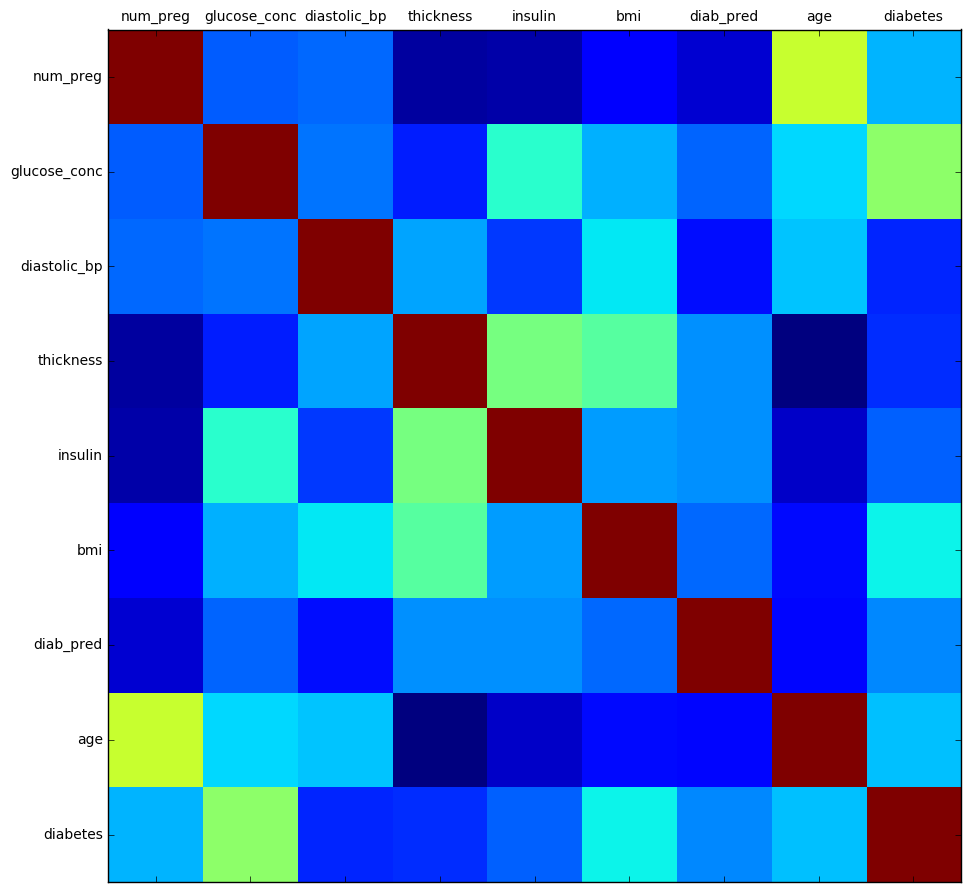

In [19]:
plot_corr(df)

#### Check data types

In [20]:
df.head(5)# Diabetes features are to be converted to boolean vlaues as they are in string values 

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [21]:
# Change True to 1 and False to 0. First create a mapping dictionary

diabetes_map = {True : 1,False : 0}

In [22]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [23]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check True/Fasle ratio

In [24]:
num_true =  len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of Trues cases : {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("Number of False cases : {0} ({1:2.2f}%)".format(num_false,(num_false/(num_true + num_false))*100)) 

# with this distribution of data we can use standard prediction techincs no special work needed

Number of Trues cases : 268 (34.90%)
Number of False cases : 500 (65.10%)


In [25]:
print(num_false)# number of false cases

500


In [26]:
print(num_true)# number of true cases

268


### Spilting the data into  Training and Test data sets

70% for training and 30% for testing

In [27]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred',
                     'age',]
predicted_class_names = ['diabetes']

X = df[feature_col_names].values  # predictor feature columns(8 X m)
y = df[predicted_class_names].values  # predicted class [1=true, 0=false] (1 X m)

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state =42)
                                   # test_size = 0.3 is 30%, 42,a constant,is answer to everything 
                                   #this assures that results of split function remains same
#X_train and X_test  -->  features columns
#y_train and y_test  -->  diabetes results
#y result is a function of X features

### We check to ensure we have desired 70% of train and 30% test split of data set

In [28]:
value1 =  len(X_train)
value2 =  len(X_test)
value3 =  len(df.index)

value4 = (value1/value3)*100
value5 = (value2/value3)*100

print("{0:0.2f}% in training set".format(value4))
print("{0:0.2f}% in test set".format(value5))

69.92% in training set
30.08% in test set


### Varifying predicted value was split correctly

In [29]:
value1 = len(df.loc[df['diabetes'] == 1])
value2 = len(df.loc[df['diabetes'] == 0])
value3 =  len(df.index)

print("Original true : {0} ({1:0.2f}%)".format(value1 , (value1/value3)*100))
print("Original true : {0} ({1:0.2f}%)".format(value2 , (value2/value3)*100))

Original true : 268 (34.90%)
Original true : 500 (65.10%)


In [30]:
value1 = len(y_train[y_train[:] == 1])
value2 = len(y_train[y_train[:] == 0])
value3 = len(y_train)

print("Training True : {0} ({1:0.2f}%)".format(value1 , (value1/value3)*100.0))
print("Training False : {0} ({1:0.2f}%)".format(value2 , (value2/value3)*100.0))

Training True : 188 (35.01%)
Training False : 349 (64.99%)


In [31]:
value1 = len(y_test[y_test[:] == 1])
value2 = len(y_test[y_test[:] == 0])
value3 = len(y_test)

print("Test True : {0} ({1:0.2f}%)".format(value1 , (value1/value3)*100.0))
print("Test False : {0} ({1:0.2f}%)".format(value2 , (value2/value3)*100.0))

Test True : 80 (34.63%)
Test False : 151 (65.37%)


### Post-split Data Preparation

#### Hidden Missing Values

In [32]:
df.head(5) # note thickness=0 in 3rd row!

# Are these 0 values possible?

# How many rows have unexpected 0 values?

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
print(" #Rows in dataframe {0}".format(len(df)))
print(" #Rows missing glucose_conc {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print(" #Rows missing diastolic_bp {0}".format(len(df.loc[df['diastolic_bp']==0])))
print(" #Rows missing thickness {0}".format(len(df.loc[df['thickness']==0])))
print(" #Rows missing insulin {0}".format(len(df.loc[df['insulin']==0])))
print(" #Rows missing bmi {0}".format(len(df.loc[df['bmi']==0])))
print(" #Rows missing diab_pred {0}".format(len(df.loc[df['diab_pred']==0])))
print(" #Rows missing age {0}".format(len(df.loc[df['age']==0])))

# Domain expertise may be required to determine which missing values are important

 #Rows in dataframe 768
 #Rows missing glucose_conc 5
 #Rows missing diastolic_bp 35
 #Rows missing thickness 227
 #Rows missing insulin 374
 #Rows missing bmi 11
 #Rows missing diab_pred 0
 #Rows missing age 0


#### Impute with the mean 

In [34]:
from sklearn.preprocessing import Imputer

# Impute with mean all 0 readings

fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0) # axis = 0 --> column

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

#Create Gaussian Naive Bayes Model object and train it with the data

nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

# with this naive.bayes model has been trained.

GaussianNB()

### Performance on Training data

In [36]:
nb_predict_train = nb_model.predict(X_train)

# import the performance matrics library
from sklearn import metrics

# Accuracy
print("Accuracy : {0:0.4f}%".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()

# we get over 75% accuracy against training data

Accuracy : 0.7542%



### Performance on Test data


In [37]:
#Predict values using test data

nb_predict_test = nb_model.predict(X_test)

In [38]:
# Accuracy
print("Accuracy : {0:0.4f}%".format(metrics.accuracy_score(y_test,nb_predict_test)))
print()

# we get over 73% accuracy against test data wich is less than training data, but it is over 70%

Accuracy : 0.7359%



#### Metrics

In [39]:
print("Confusion Metrix")

# Note the use of lables for set 1= True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, nb_predict_test, labels=[1,0])))

# 52 and 33 are predicted true 
# 28 and 118 are predicted false 

# 52 and 28 are actual true values
# 33 118 are actual false values

# 52 28  TP FP (True Positve TP-52 Actual and predicted, False Predicted FP-28 predicted to have)
# 33 118 FN TN (False Negative FN-33 predicted not to have, True NegatveTN-118 not predict and also not having

# "Perfect" Classifier
# 80  0
# 0   151

#Our classifier is hence not perfect!!!

# recall = True rate and sensitivity.  Recall = TP/(TP+FN) our value is  65% This sholud be greater than 70%

# Precision = having and predcited accurately. Precision = TP/(TP+FP)

Confusion Metrix
[[ 52  28]
 [ 33 118]]
Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42) # create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [41]:
rf_predict_train = rf_model.predict(X_train)

print("Accuracy : {0:0.4f}%".format(metrics.accuracy_score(y_train,rf_predict_train)))
print()

Accuracy : 0.9870%



#### Predict Test Data

In [42]:
rf_predict_test = rf_model.predict(X_test) 

# import the performance matrics library
from sklearn import metrics

print("Accuracy : {0:0.4f}%".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

# big drop from trainig data!!!

Accuracy : 0.7100%



#### Metrics

In [43]:
print("Test Metrics")
print("Confusion Metrix")

# Note the use of lables for set 1= True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1,0])))

# recall and precision both are low. Model has learned training data too well!

Test Metrics
Confusion Metrix
[[ 43  37]
 [ 30 121]]
Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



## Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.7, random_state = 42) # C is a hyper parameter
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

NameError: name 'X_train' is not defined

In [45]:
print("Confusion Metrix")

# Note the use of lables for set 1= True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, lr_predict_test, labels=[1,0])))

# here also recall and precision both are low. 

Confusion Metrix
[[ 44  36]
 [ 23 128]]
Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



Setting regularization parameter

ist max values of 0.613 occured at C=1.400
Using matplotlib backend: Qt5Agg


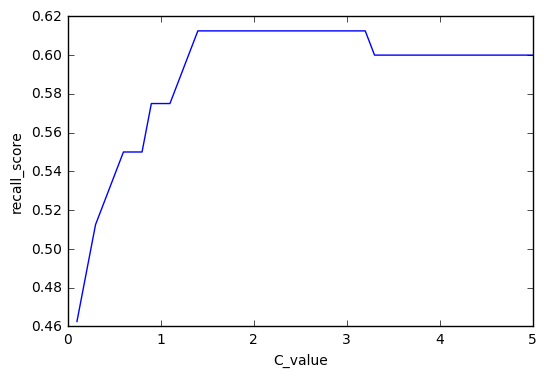

In [46]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values , recall_scores = [], []
 
C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
  
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("ist max values of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val))

%matplotlib
plt.plot(C_values,recall_scores,"-")
plt.xlabel("C_value")
plt.ylabel("recall_score")

# we are still not getting recall over 70%!!!!

# This low recall value may be due to imbalance in data. 
# There are more non-diabetes then diabetes results in data.
# 65% No Diabetes, 35% diabetes. Can becausing baises estimation giving poor prediction results.

### Logistic Regression with class_weight='balanced'

In [3]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values , recall_scores = [], []
 
C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight = 'balanced', random_state = 42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
  
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("ist max values of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val))

%matplotlib inline
plt.plot(C_values,recall_scores,"-")
plt.xlabel("C_value")
plt.ylabel("recall_score")

NameError: name 'X_train' is not defined

In [7]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = best_score_C_val, class_weight = 'balanced', random_state = 42) 
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

NameError: name 'best_score_C_val' is not defined

In [6]:
lr_predict_test = lr_model.predict(X_test)

print("Test Metrics")
print("Confusion Metrix")

# Note the use of lables for set 1= True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, lr_predict_test, labels=[1,0])))

# With this change we are able to achieve greater accuracy and recall rate better then 70%.

NameError: name 'X_test' is not defined

### LogisticRegressionCV

In [4]:
from sklearn.linear_model import LogisticRegressionCV

# set number of folds= cross-validation in constructor of model, n_jobs = -1 means use all cpu cores in system
#
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = True, class_weight = 'balanced')
lr_cv_model.fit(X_train, y_train.ravel())

NameError: name 'X_train' is not defined

### Predict on Test data

In [5]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Test Metrics")
print("Confusion Metrix")

# Note the use of lables for set 1= True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0])))

# With this change we are able to achieve greater accuracy and recall rate better then 70%.
 
#Recall score is lower than what we had earlier.

#Try change cs parameter which loops over and see if it changes the result.

NameError: name 'X_test' is not defined